#  Visualizing Inequalities in Life Expectancy

dataset:
http://data.un.org/Data.aspx?d=GenderStat&f=inID:37&c=1,2,3,4,5,6&s=crEngName:asc,sgvEngName:asc,timeEngName:desc&v=1

## 1. Import United Nations Data 

In [6]:

# This sets plot images to a nice size
options(repr.plot.width = 6, repr.plot.height = 6)

# Loading packages
library(dplyr)
library(tidyr)
library(ggplot2)

# Loading data
life_expectancy <- read.csv("UNdata_Export_20191117.csv")

# Taking a look at the first few rows
life_expectancy

Country.or.Area,Subgroup,Year,Source,Unit,Value,Value.Footnotes
<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>
Afghanistan,Female,2000-2005,UNPD_World Population Prospects_2006 (International estimate),Years,42,NA
Afghanistan,Female,1995-2000,UNPD_World Population Prospects_2006 (International estimate),Years,42,NA
Afghanistan,Female,1990-1995,UNPD_World Population Prospects_2006 (International estimate),Years,42,NA
Afghanistan,Female,1985-1990,UNPD_World Population Prospects_2006 (International estimate),Years,41,NA
Afghanistan,Male,2000-2005,UNPD_World Population Prospects_2006 (International estimate),Years,42,NA
Afghanistan,Male,1995-2000,UNPD_World Population Prospects_2006 (International estimate),Years,42,NA
Afghanistan,Male,1990-1995,UNPD_World Population Prospects_2006 (International estimate),Years,42,NA
Afghanistan,Male,1985-1990,UNPD_World Population Prospects_2006 (International estimate),Years,41,NA
Albania,Female,2000-2005,UNPD_World Population Prospects_2006 (International estimate),Years,79,NA


## 2. Life expectancy of men vs. women by country

In [5]:

# Subsetting and reshaping the life expectancy data
subdata <- life_expectancy  %>% 
            filter(Year == "2000-2005")%>%
            select(Country.or.Area, Subgroup, Value)%>%
            spread(Subgroup, Value)

# Taking a look at the first few rows
head(subdata)

Country.or.Area,Female,Male
<fct>,<int>,<int>
Afghanistan,42,42
Albania,79,73
Algeria,72,70
Angola,43,39
Argentina,78,71
Armenia,75,68


## 3. Data Visualization I

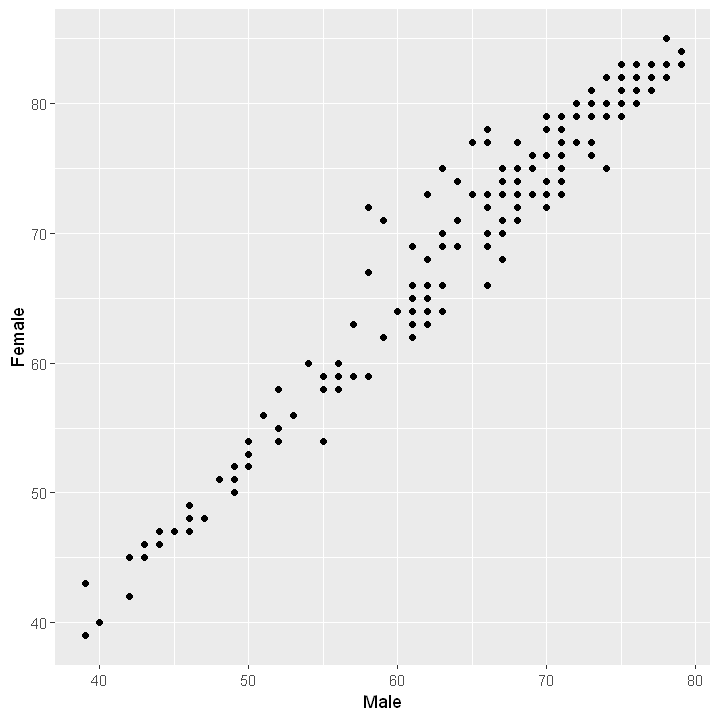

In [7]:
# Plotting male and female life expectancy
ggplot(subdata, aes(x=Male, y=Female))+
geom_point()

## 4. Reference lines I

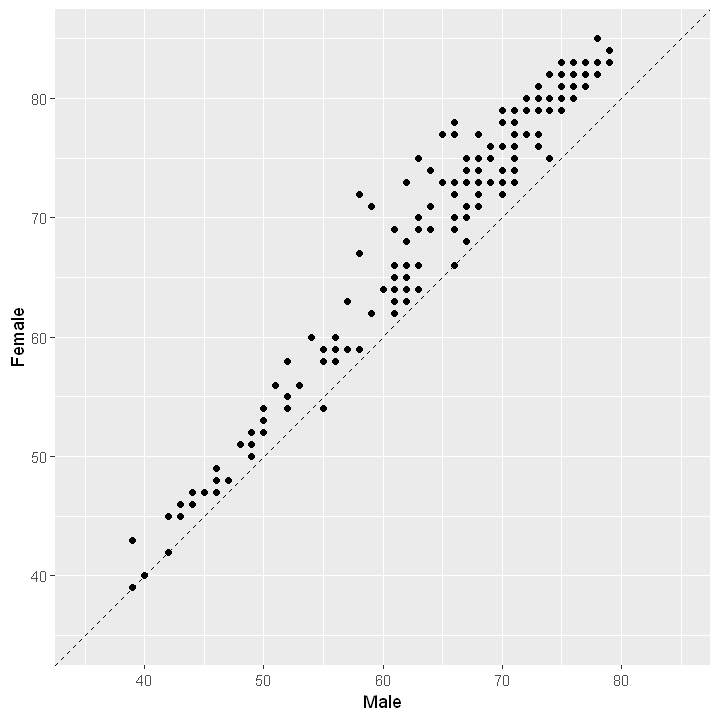

In [8]:

# Adding an abline and changing the scale of axes of the previous plots
ggplot(subdata, aes(x=Male, y=Female))+
geom_point()+
scale_x_continuous(limits=c(35,85))+
geom_abline(intercept=0, slope=1, linetype=2)+
scale_y_continuous(limits=c(35,85))

## 5. Plot titles and axis labels

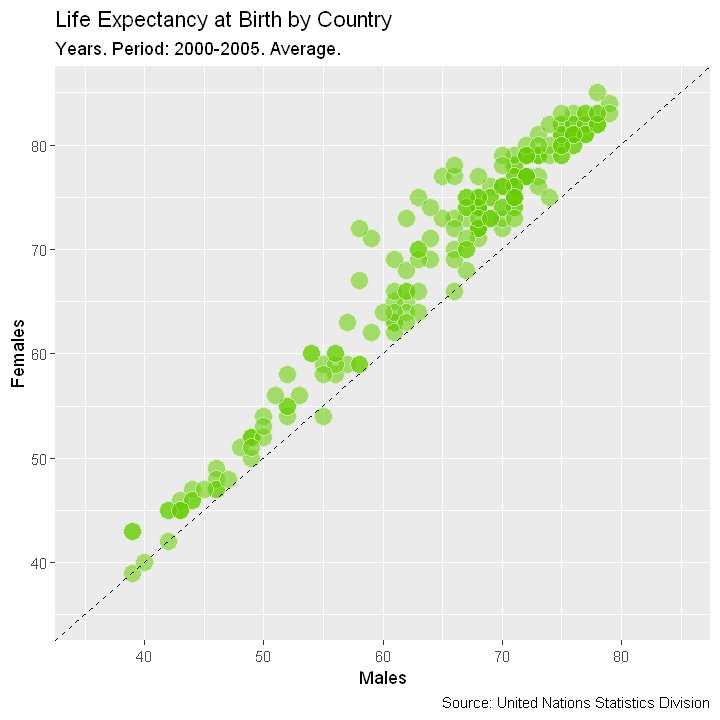

In [9]:
# Adding labels to previous plot
ggplot(subdata, aes(x=Male, y=Female))+
  geom_point(colour="white", fill="chartreuse3", shape=21, alpha=.55, size=5)+
  geom_abline(intercept = 0, slope = 1, linetype=2)+
  scale_x_continuous(limits=c(35,85))+
  scale_y_continuous(limits=c(35,85))+
  labs(title="Life Expectancy at Birth by Country",
       subtitle="Years. Period: 2000-2005. Average.",
       caption="Source: United Nations Statistics Division",
       x="Males",
       y="Females")

## 6. Highlighting remarkable countries

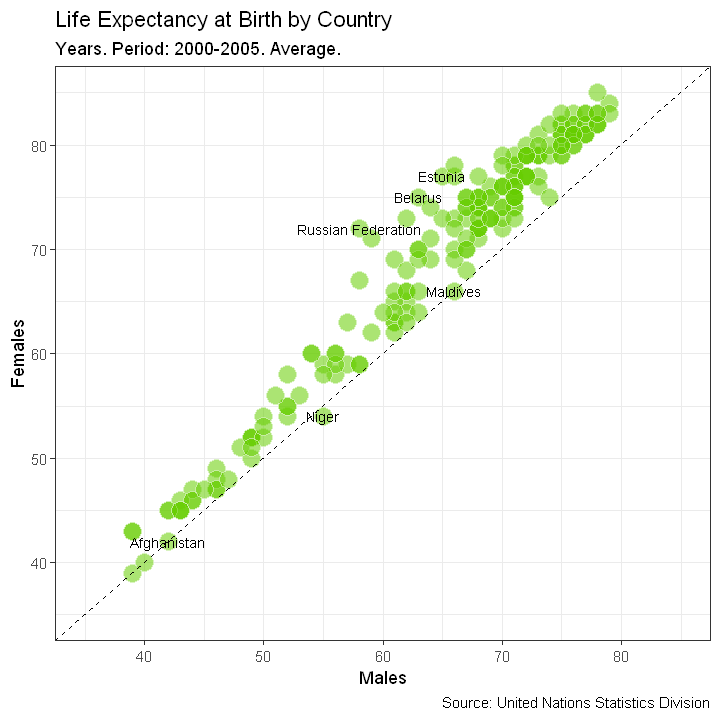

In [10]:
# Subseting data to obtain countries of interest
top_male <- subdata %>% arrange(Male-Female) %>% head(3)
top_female <- subdata %>% arrange(Female-Male) %>% head(3)

# Adding text to the previous plot to label countries of interest
ggplot(subdata, aes(x=Male, y=Female, label=Country.or.Area))+
  geom_point(colour="white", fill="chartreuse3", shape=21, alpha=.55, size=5)+
  geom_abline(intercept = 0, slope = 1, linetype=2)+
  scale_x_continuous(limits=c(35,85))+
  scale_y_continuous(limits=c(35,85))+
  labs(title="Life Expectancy at Birth by Country",
       subtitle="Years. Period: 2000-2005. Average.",
       caption="Source: United Nations Statistics Division",
       x="Males",
       y="Females")+
  geom_text(data=top_male, size=3)+
  geom_text(data=top_female, size=3)+
  theme_bw()

## 7. How has life expectancy by gender evolved?

In [11]:
# Subsetting, mutating and reshaping the life expectancy data
subdata2 <- life_expectancy %>% 
  filter(Year %in% c("1985-1990", "2000-2005")) %>% 
  mutate(Sub_Year=paste(Subgroup, Year, sep="_")) %>% 
  mutate(Sub_Year=gsub("-", "_", Sub_Year)) %>% 
  select(-Subgroup, -Year) %>% 
  spread(Sub_Year, Value)%>%
  mutate(diff_Female = Female_2000_2005 - Female_1985_1990)%>%
  mutate(diff_Male = Male_2000_2005 - Male_1985_1990)

# Taking a look at the first few rows
head(subdata2)

Country.or.Area,Source,Unit,Value.Footnotes,Female_1985_1990,Female_2000_2005,Male_1985_1990,Male_2000_2005,diff_Female,diff_Male
<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Afghanistan,UNPD_World Population Prospects_2006 (International estimate),Years,NA,41,42,41,42,1,1
Albania,UNPD_World Population Prospects_2006 (International estimate),Years,NA,75,79,69,73,4,4
Algeria,UNPD_World Population Prospects_2006 (International estimate),Years,NA,67,72,65,70,5,5
Angola,UNPD_World Population Prospects_2006 (International estimate),Years,NA,42,43,38,39,1,1
Argentina,UNPD_World Population Prospects_2006 (International estimate),Years,NA,75,78,68,71,3,3
Armenia,UNPD_World Population Prospects_2006 (International estimate),Years,NA,71,75,66,68,4,2


## 8. Visualize

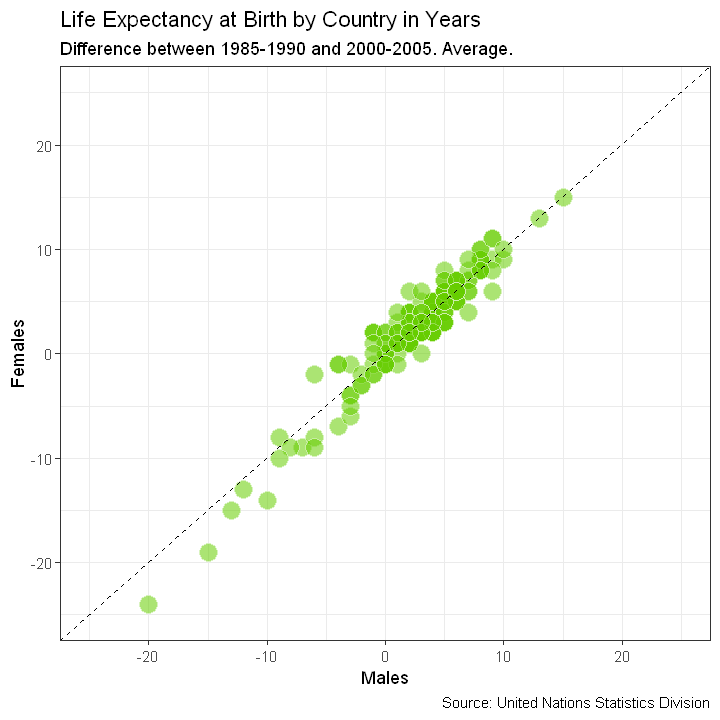

In [12]:

# Doing a nice first version of the plot with abline, scaling axis and adding labels
ggplot(subdata2, aes(x=diff_Male, y=diff_Female, label=Country.or.Area))+
  geom_point(colour="white", fill="chartreuse3", shape=21, alpha=.55, size=5)+
  geom_abline(intercept = 0, slope = 1, linetype=2)+
  scale_x_continuous(limits=c(-25,25))+
  scale_y_continuous(limits=c(-25,25))+
  labs(title="Life Expectancy at Birth by Country in Years",
       subtitle="Difference between 1985-1990 and 2000-2005. Average.",
       caption="Source: United Nations Statistics Division",
       x="Males",
       y="Females")+
theme_bw()

## 9. Reference lines II

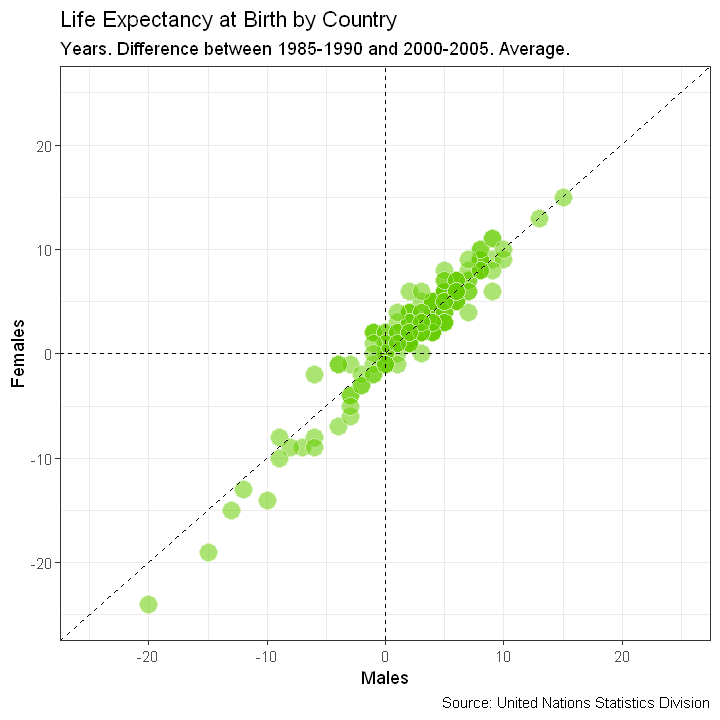

In [13]:
# Adding an hline and vline to previous plots
ggplot(subdata2, aes(x=diff_Male, y=diff_Female, label=Country.or.Area))+
  geom_point(colour="white", fill="chartreuse3", shape=21, alpha=.55, size=5)+
  geom_abline(intercept = 0, slope = 1, linetype=2)+
  scale_x_continuous(limits=c(-25,25))+
  scale_y_continuous(limits=c(-25,25))+
  geom_hline(yintercept = 0, linetype=2)+
  geom_vline(xintercept = 0, linetype=2)+
  labs(title="Life Expectancy at Birth by Country",
       subtitle="Years. Difference between 1985-1990 and 2000-2005. Average.",
       caption="Source: United Nations Statistics Division",
       x="Males",
       y="Females")+
theme_bw()

## 10. Highlighting remarkable countries II

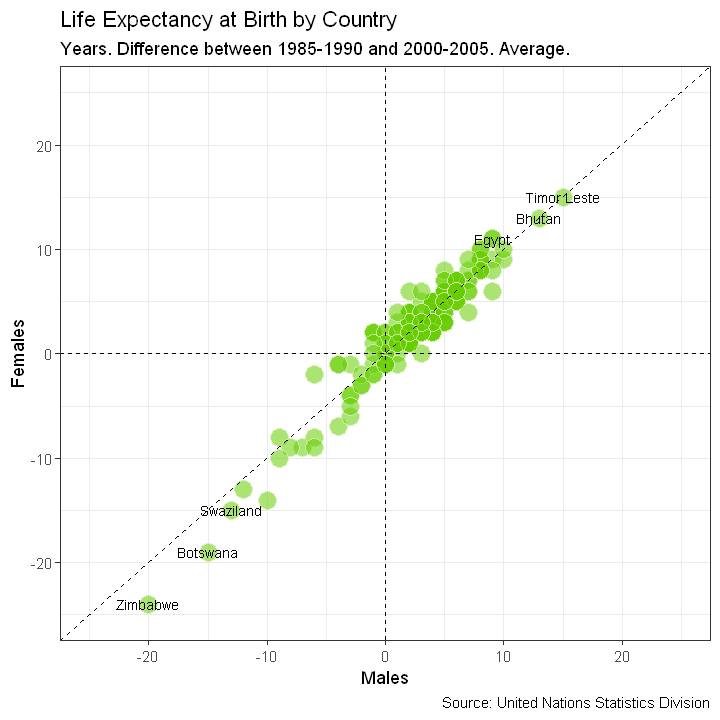

In [14]:
# Subseting data to obtain countries of interest
top <- subdata2 %>% arrange(diff_Male+diff_Female) %>% head(3)
bottom <-  subdata2 %>% arrange(-(diff_Male+diff_Female)) %>% head(3)

# Adding text to the previous plot to label countries of interest
ggplot(subdata2, aes(x=diff_Male, y=diff_Female, label=Country.or.Area), guide=FALSE)+
  geom_point(colour="white", fill="chartreuse3", shape=21, alpha=.55, size=5)+
  geom_abline(intercept = 0, slope = 1, linetype=2)+
  scale_x_continuous(limits=c(-25,25))+
  scale_y_continuous(limits=c(-25,25))+
  geom_hline(yintercept=0, linetype=2)+
  geom_vline(xintercept=0, linetype=2)+
  labs(title="Life Expectancy at Birth by Country",
       subtitle="Years. Difference between 1985-1990 and 2000-2005. Average.",
       caption="Source: United Nations Statistics Division",
       x="Males",
       y="Females")+
  geom_text(data=top, size=3)+
  geom_text(data=bottom, size=3)+
  theme_bw()